In [1]:
import replicator

In [2]:
import numpy as np

In [3]:
payoff_mat1 = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
labels = ["Rock", "Paper", "Scissors"]

In [4]:
time = np.linspace(0, 100, 200)

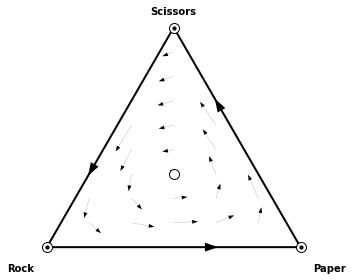

In [5]:
plot, info = replicator.plot2D(
    payoff_mat1,
    labels,
    time,
);

In [6]:
info

['There are a total of 4 fixed points.',
 '[0.0, 0.0, 1.0] is a saddle point.',
 '[0.0, 1.0, 0.0] is a saddle point.',
 '[0.3333333333333333, 0.3333333333333333, 0.3333333333333333] is a source point.',
 '[1.0, 0.0, 0.0] is a saddle point.']

In [7]:
payoff_mat2 = np.array([[0, 1, 1], [1, 0, -1], [-1, 1, 0]])
labels = ["Rock", "Paper", "Scissors"]

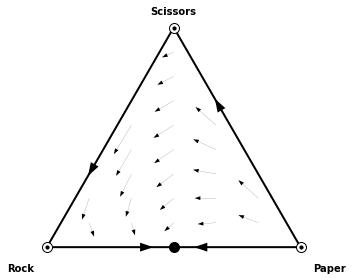

In [8]:
plot, info = replicator.plot2D(
    payoff_mat2,
    labels,
    time,
    num_of_edge_ics=[2, 1, 1],
    
);

In [9]:
info

['There are a total of 4 fixed points.',
 '[0.0, 0.0, 1.0] is a saddle point.',
 '[0.0, 1.0, 0.0] is a saddle point.',
 '[0.5, 0.5, 0.0] is a sink point.',
 '[1.0, 0.0, 0.0] is a saddle point.']

In [10]:
import matplotlib.pyplot as plt

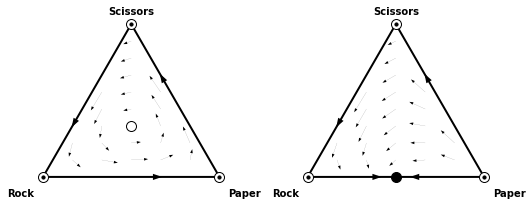

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(7.5, 7.5))

plot, info = replicator.plot2D(
    payoff_mat1,
    labels,
    time,
    ax=ax[0]
);

plot, info = replicator.plot2D(
    payoff_mat2,
    labels,
    time,
    num_of_edge_ics=[2, 1, 1],
    ax=ax[1]
);

plt.tight_layout()